In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, sys, glob

import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

import seaborn as sns
color = sns.color_palette()
sns.set_style("whitegrid")

# 机器学习基础

## 误差与过拟合

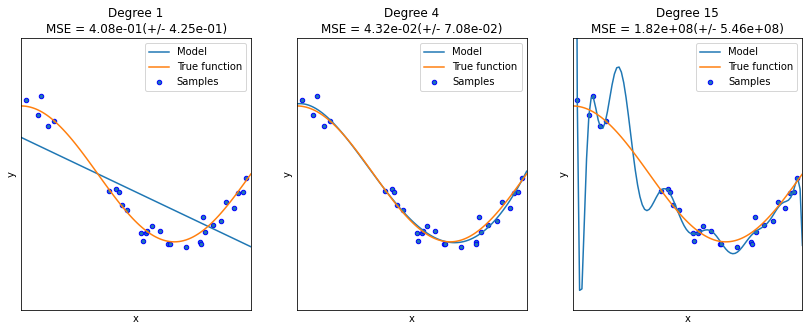

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(
        pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10
    )

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title(
        "Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
            degrees[i], -scores.mean(), scores.std()
        )
    )
plt.show()

## 模型评价方法

- https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics
- https://scikit-learn.org/stable/modules/model_evaluation.html


### Classification metrics

| 评价指标                                                     | 作用                                                         |
| ------------------------------------------------------------ | ------------------------------------------------------------ |
| [`metrics.accuracy_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score)(y_true, y_pred, *[, ...]) | Accuracy classification score.                               |
| [`metrics.auc`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html#sklearn.metrics.auc)(x, y) | Compute Area Under the Curve (AUC) using the trapezoidal rule. |
| [`metrics.average_precision_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.average_precision_score.html#sklearn.metrics.average_precision_score)(y_true, ...) | Compute average precision (AP) from prediction scores.       |
| [`metrics.balanced_accuracy_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html#sklearn.metrics.balanced_accuracy_score)(y_true, ...) | Compute the balanced accuracy.                               |
| [`metrics.brier_score_loss`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.brier_score_loss.html#sklearn.metrics.brier_score_loss)(y_true, y_prob, *) | Compute the Brier score loss.                                |
| [`metrics.classification_report`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report)(y_true, y_pred, *) | Build a text report showing the main classification metrics. |
| [`metrics.cohen_kappa_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.cohen_kappa_score.html#sklearn.metrics.cohen_kappa_score)(y1, y2, *[, ...]) | Cohen's kappa: a statistic that measures inter-annotator agreement. |
| [`metrics.confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix)(y_true, y_pred, *) | Compute confusion matrix to evaluate the accuracy of a classification. |
| [`metrics.dcg_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.dcg_score.html#sklearn.metrics.dcg_score)(y_true, y_score, *[, k, ...]) | Compute Discounted Cumulative Gain.                          |
| [`metrics.det_curve`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.det_curve.html#sklearn.metrics.det_curve)(y_true, y_score[, ...]) | Compute error rates for different probability thresholds.    |
| [`metrics.f1_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score)(y_true, y_pred, *[, ...]) | Compute the F1 score, also known as balanced F-score or F-measure. |
| [`metrics.fbeta_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.fbeta_score.html#sklearn.metrics.fbeta_score)(y_true, y_pred, *, beta) | Compute the F-beta score.                                    |
| [`metrics.hamming_loss`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.hamming_loss.html#sklearn.metrics.hamming_loss)(y_true, y_pred, *[, ...]) | Compute the average Hamming loss.                            |
| [`metrics.hinge_loss`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.hinge_loss.html#sklearn.metrics.hinge_loss)(y_true, pred_decision, *) | Average hinge loss (non-regularized).                        |
| [`metrics.jaccard_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.jaccard_score.html#sklearn.metrics.jaccard_score)(y_true, y_pred, *[, ...]) | Jaccard similarity coefficient score.                        |
| [`metrics.log_loss`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html#sklearn.metrics.log_loss)(y_true, y_pred, *[, eps, ...]) | Log loss, aka logistic loss or cross-entropy loss.           |
| [`metrics.matthews_corrcoef`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.matthews_corrcoef.html#sklearn.metrics.matthews_corrcoef)(y_true, y_pred, *) | Compute the Matthews correlation coefficient (MCC).          |
| [`metrics.multilabel_confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.multilabel_confusion_matrix.html#sklearn.metrics.multilabel_confusion_matrix)(y_true, ...) | Compute a confusion matrix for each class or sample.         |
| [`metrics.ndcg_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ndcg_score.html#sklearn.metrics.ndcg_score)(y_true, y_score, *[, k, ...]) | Compute Normalized Discounted Cumulative Gain.               |
| [`metrics.precision_recall_curve`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html#sklearn.metrics.precision_recall_curve)(y_true, ...) | Compute precision-recall pairs for different probability thresholds. |
| [`metrics.precision_recall_fscore_support`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html#sklearn.metrics.precision_recall_fscore_support)(...) | Compute precision, recall, F-measure and support for each class. |
| [`metrics.precision_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score)(y_true, y_pred, *[, ...]) | Compute the precision.                                       |
| [`metrics.recall_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score)(y_true, y_pred, *[, ...]) | Compute the recall.                                          |
| [`metrics.roc_auc_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score)(y_true, y_score, *[, ...]) | Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores. |
| [`metrics.roc_curve`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve)(y_true, y_score, *[, ...]) | Compute Receiver operating characteristic (ROC).             |
| [`metrics.top_k_accuracy_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.top_k_accuracy_score.html#sklearn.metrics.top_k_accuracy_score)(y_true, y_score, *) | Top-k Accuracy classification score.                         |
| [`metrics.zero_one_loss`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.zero_one_loss.html#sklearn.metrics.zero_one_loss)(y_true, y_pred, *[, ...]) | Zero-one classification loss.                                |

In [2]:
from sklearn.metrics import accuracy_score
print(accuracy_score([1, 1, 1], [0, 1, 1]))

0.6666666666666666


In [3]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score([1, 0, 1], [0.1, 0.1, 0.2]))

0.75


In [4]:
from sklearn.metrics import f1_score
print(f1_score([1, 1, 1], [0, 1, 1]))

0.8


In [5]:
from sklearn.metrics import classification_report
print(classification_report([1, 1, 0], [0, 1, 1]))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      0.50      0.50         2

    accuracy                           0.33         3
   macro avg       0.25      0.25      0.25         3
weighted avg       0.33      0.33      0.33         3



### Regression metrics

See the [Regression metrics](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics) section of the user guide for further details.

| 评价指标                                                     | 作用                                                         |
| ------------------------------------------------------------ | ------------------------------------------------------------ |
| [`metrics.explained_variance_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.explained_variance_score.html#sklearn.metrics.explained_variance_score)(y_true, ...) | Explained variance regression score function.                |
| [`metrics.max_error`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.max_error.html#sklearn.metrics.max_error)(y_true, y_pred) | The max_error metric calculates the maximum residual error.  |
| [`metrics.mean_absolute_error`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html#sklearn.metrics.mean_absolute_error)(y_true, y_pred, *) | Mean absolute error regression loss.                         |
| [`metrics.mean_squared_error`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error)(y_true, y_pred, *) | Mean squared error regression loss.                          |
| [`metrics.mean_squared_log_error`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_log_error.html#sklearn.metrics.mean_squared_log_error)(y_true, y_pred, *) | Mean squared logarithmic error regression loss.              |
| [`metrics.median_absolute_error`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.median_absolute_error.html#sklearn.metrics.median_absolute_error)(y_true, y_pred, *) | Median absolute error regression loss.                       |
| [`metrics.mean_absolute_percentage_error`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_percentage_error.html#sklearn.metrics.mean_absolute_percentage_error)(...) | Mean absolute percentage error (MAPE) regression loss.       |
| [`metrics.r2_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score)(y_true, y_pred, *[, ...]) | R2 (coefficient of determination) regression score function. |
| [`metrics.mean_poisson_deviance`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_poisson_deviance.html#sklearn.metrics.mean_poisson_deviance)(y_true, y_pred, *) | Mean Poisson deviance regression loss.                       |
| [`metrics.mean_gamma_deviance`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_gamma_deviance.html#sklearn.metrics.mean_gamma_deviance)(y_true, y_pred, *) | Mean Gamma deviance regression loss.                         |
| [`metrics.mean_tweedie_deviance`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_tweedie_deviance.html#sklearn.metrics.mean_tweedie_deviance)(y_true, y_pred, *) | Mean Tweedie deviance regression loss.                       |
| [`metrics.d2_tweedie_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.d2_tweedie_score.html#sklearn.metrics.d2_tweedie_score)(y_true, y_pred, *) | D^2 regression score function, percentage of Tweedie deviance explained. |
| [`metrics.mean_pinball_loss`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_pinball_loss.html#sklearn.metrics.mean_pinball_loss)(y_true, y_pred, *) | Pinball loss for quantile regression.                        |

In [6]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error([1, 1, 1], [2, 3, 4])

2.0

In [7]:
from sklearn.metrics import mean_squared_error
mean_squared_error([1, 1, 1], [2, 3, 4])

4.666666666666667

# 机器学习模型

在sklearn中包含了非常多的机器学习模型，在sklearn中模型称为`estimators`，可以使用`fit`函数来完成训练。

`fit`函数需要输入`X`和`y`，其中`X`的维度为`(n_samples, n_features)`，每个样本组织为一行，一列为一个具体的特征。`y`为目标标签，对于回归问题则输入数值数据，对于分类任务输入数据为离散数值。对于无监督学习，`y`不用输入。`y`的维度为一维，长度为`n_samples`。

## 线性模型

Ordinary Least Squares: $\min_{w} || X w - y||_2^2$

In [8]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit([[0, 0], [1, 1], [2, 2]],  [0, 1, 2])

reg.coef_

array([0.5, 0.5])

Ridge regression: $\min_{w} || X w - y||_2^2 + \alpha ||w||_2^2$

In [9]:
from sklearn import linear_model
reg = linear_model.Ridge(alpha=.5)
reg.fit([[0, 0], [1, 1], [2, 2]],  [0, 1, 2])

reg.coef_, reg.intercept_

(array([0.44444444, 0.44444444]), 0.11111111111111116)

Lasso: $\min_{w} { \frac{1}{2n_{\text{samples}}} ||X w - y||_2 ^ 2 + \alpha ||w||_1}$

In [10]:
from sklearn import linear_model
reg = linear_model.Lasso(alpha=0.1)
reg.fit([[0, 0], [1, 1]], [0, 1])

reg.coef_

array([0.6, 0. ])

Logistic regression: $\min_{w, c} \frac{1}{2}w^T w + C \sum_{i=1}^n \log(\exp(- y_i (X_i^T w + c)) + 1) .$

## 树模型

### DecisionTreeClassifier

In [11]:
from sklearn import tree
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)
clf.predict([[2., 2.]])

array([1])

[Text(0.5, 0.75, 'X[0] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

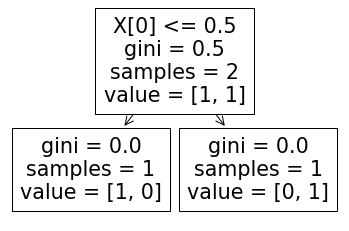

In [12]:
tree.plot_tree(clf)

[Text(0.5, 0.9166666666666666, 'X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini

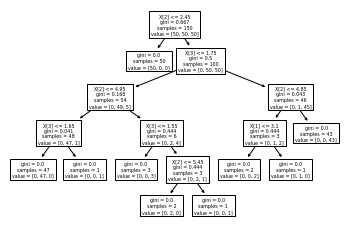

In [13]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
X, y = iris.data, iris.target
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
tree.plot_tree(clf)

### DecisionTreeRegressor

In [14]:
from sklearn import tree
X = [[0, 0], [2, 2]]
y = [0.5, 2.5]
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X, y)
clf.predict([[1, 1]])

array([0.5])

## KNN



In [15]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)

X = [[0], [1], [2], [3]]
y = [0, 0, 1, 1]
neigh.fit(X, y)

print(neigh.predict([[1.1]]))

[0]


In [16]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=3)

X = [[0], [1], [2], [3]]
y = [0, 0, 1, 1]
neigh.fit(X, y)

print(neigh.predict([[1.1]]))

[0.33333333]


## 深度学习

这里我们使用sklearn中的全连接网络，其他网络模块在其他章节的pytorch代码中。

In [17]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
X, y = make_classification(n_samples=100, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=1)
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
clf.predict_proba(X_test[:1])

clf.predict(X_test[:5, :])

clf.score(X_test, y_test)

0.88

In [18]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
X, y = make_regression(n_samples=200, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=1)
regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)
regr.predict(X_test[:2])

regr.score(X_test, y_test)

/home/lyz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


0.4162338898076595

# sklearn介绍与使用

本教程汇总了sklearn教程的案例以及基础使用，主要目的是为了学习和汇总。教程的主要代码和文字来源为具体库的官方文档。

- 入门教程：https://scikit-learn.org/stable/getting_started.html
- 用户指南：https://scikit-learn.org/stable/user_guide.html
- 使用案例：https://scikit-learn.org/stable/auto_examples/index.html

In [19]:
from sklearn import neighbors, datasets, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris = datasets.load_iris() 
X, y = iris.data[:, :], iris.target

# 数据划分
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33)

# 数据预处理
scaler = preprocessing.StandardScaler().fit(X_train)

X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)

# 定义模型
knn = neighbors.KNeighborsClassifier(n_neighbors=3)

# 模型训练
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.8947368421052632

## 数据划分
https://scikit-learn.org/stable/modules/cross_validation.html

In [20]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm

X, y = datasets.load_iris(return_X_y=True)
X.shape, y.shape

((150, 4), (150,))

In [21]:
x_train, val_train, x_label, val_label = train_test_split(X, y,
                                            test_size=0.25)

# test_size 用于验证 & 测试的数据比例 -》 剩下的训练集的比例
x_train.shape, val_train.shape

((112, 4), (38, 4))

In [22]:
clf = svm.SVC(kernel='linear', C=1, random_state=42) # 定义一个SVM 分类器
clf.fit(x_train, x_label) # 训练
clf.score(val_train, val_label) # 打分

0.9473684210526315

In [23]:
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, X, y, cv=5)
scores

array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

In [24]:
# hold-out
from sklearn.model_selection import train_test_split

# K折交叉验证
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold

# K折分布保持交叉验证
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold

# 时间序列划分方法
from sklearn.model_selection import TimeSeriesSplit

# booststrap 采样
from sklearn.utils import resample

In [25]:
import numpy as np
X = np.zeros((20, 5))
Y = np.array([1]*5 + [2]*5 + [3]*5 + [4]*5)
print(X, Y)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]] [1 1 1 1 1 2 2 2 2 2 3 3 3 3 3 4 4 4 4 4]


### 留出法

In [26]:
# 直接按照比例拆分
train_X, val_X, train_y, val_y = train_test_split(X, Y, test_size = 0.2)
print(train_y, val_y)

[2 1 3 2 4 4 4 3 4 1 3 1 1 2 2 1] [2 3 4 3]


In [27]:
# 按照比例 & 标签分布划分
train_X, val_X, train_y, val_y = train_test_split(X, Y, test_size = 0.2, stratify=Y)
print(train_y, val_y)

[3 2 3 1 3 1 2 1 3 2 4 1 4 4 4 2] [1 4 3 2]


### KFold

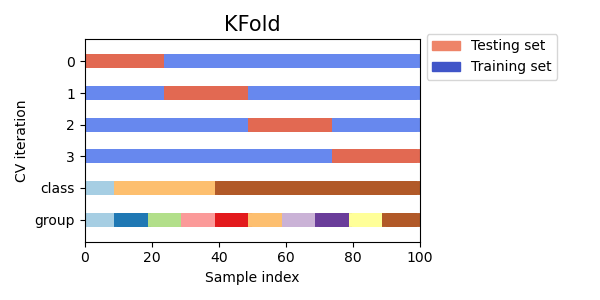

In [28]:
kf = KFold(n_splits=5)
for train_idx, test_idx, in kf.split(X, Y):
    print(train_idx, test_idx)
    print('Label', Y[test_idx])
    print('')

[ 4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] [0 1 2 3]
Label [1 1 1 1]

[ 0  1  2  3  8  9 10 11 12 13 14 15 16 17 18 19] [4 5 6 7]
Label [1 2 2 2]

[ 0  1  2  3  4  5  6  7 12 13 14 15 16 17 18 19] [ 8  9 10 11]
Label [2 2 3 3]

[ 0  1  2  3  4  5  6  7  8  9 10 11 16 17 18 19] [12 13 14 15]
Label [3 3 3 4]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15] [16 17 18 19]
Label [4 4 4 4]



In [29]:
kf = RepeatedKFold(n_splits=5, n_repeats=2)
for train_idx, test_idx, in kf.split(X, Y):
    print(train_idx, test_idx)
    print('Label', Y[test_idx])
    print('')

[ 0  1  2  4  6  8  9 10 11 12 14 15 16 17 18 19] [ 3  5  7 13]
Label [1 2 2 3]

[ 0  1  3  5  6  7  9 10 11 12 13 14 16 17 18 19] [ 2  4  8 15]
Label [1 1 2 4]

[ 0  1  2  3  4  5  7  8  9 11 12 13 15 16 18 19] [ 6 10 14 17]
Label [2 3 3 4]

[ 0  2  3  4  5  6  7  8  9 10 13 14 15 17 18 19] [ 1 11 12 16]
Label [1 3 3 4]

[ 1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17] [ 0  9 18 19]
Label [1 2 4 4]

[ 0  1  3  4  6  7  8 10 12 13 14 15 16 17 18 19] [ 2  5  9 11]
Label [1 2 2 3]

[ 0  1  2  4  5  7  8  9 10 11 13 14 15 16 17 18] [ 3  6 12 19]
Label [1 2 3 4]

[ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 16 19] [ 4 15 17 18]
Label [1 4 4 4]

[ 0  2  3  4  5  6  7  8  9 11 12 14 15 17 18 19] [ 1 10 13 16]
Label [1 3 3 4]

[ 1  2  3  4  5  6  9 10 11 12 13 15 16 17 18 19] [ 0  7  8 14]
Label [1 2 2 3]



### StratifiedKFold

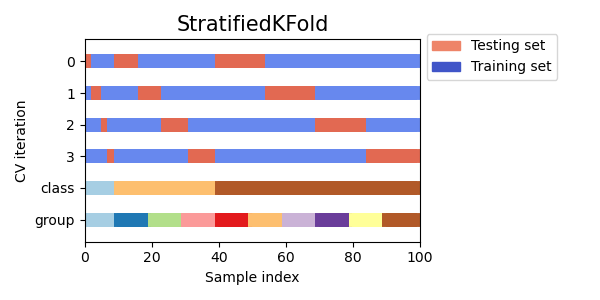

In [30]:
kf = StratifiedKFold(n_splits=5)
for train_idx, test_idx, in kf.split(X, Y):
    print(train_idx, test_idx)
    print('Label', Y[test_idx])
    print('')

[ 1  2  3  4  6  7  8  9 11 12 13 14 16 17 18 19] [ 0  5 10 15]
Label [1 2 3 4]

[ 0  2  3  4  5  7  8  9 10 12 13 14 15 17 18 19] [ 1  6 11 16]
Label [1 2 3 4]

[ 0  1  3  4  5  6  8  9 10 11 13 14 15 16 18 19] [ 2  7 12 17]
Label [1 2 3 4]

[ 0  1  2  4  5  6  7  9 10 11 12 14 15 16 17 19] [ 3  8 13 18]
Label [1 2 3 4]

[ 0  1  2  3  5  6  7  8 10 11 12 13 15 16 17 18] [ 4  9 14 19]
Label [1 2 3 4]



### GroupKFold

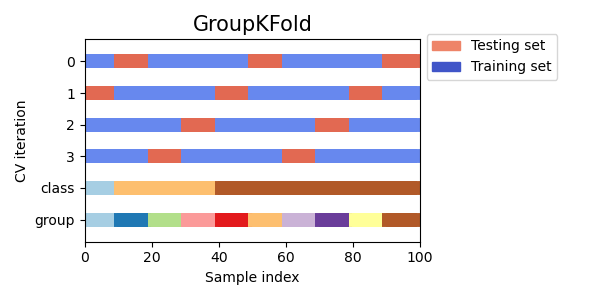

In [31]:
from sklearn.model_selection import StratifiedGroupKFold

import numpy as np
X = np.zeros((20, 5))
Y = np.array([1]*5 + [2]*5 + [3]*5 + [4]*5)
groups = [1,2,3,4] *5

gkf = StratifiedGroupKFold(n_splits=4)
for train, test in gkf.split(X, Y, groups=groups):
    print("%s %s" % (train, test))

[ 1  2  3  5  6  7  9 10 11 13 14 15 17 18 19] [ 0  4  8 12 16]
[ 0  2  3  4  6  7  8 10 11 12 14 15 16 18 19] [ 1  5  9 13 17]
[ 0  1  3  4  5  7  8  9 11 12 13 15 16 17 19] [ 2  6 10 14 18]
[ 0  1  2  4  5  6  8  9 10 12 13 14 16 17 18] [ 3  7 11 15 19]


### TimeSeriesSplit

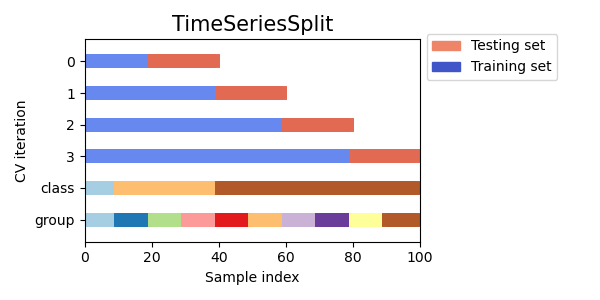

In [33]:
from sklearn.model_selection import TimeSeriesSplit

X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4, 5, 6])

tscv = TimeSeriesSplit(n_splits=3)
print(tscv)

for train, test in tscv.split(X):
    print("%s %s" % (train, test))

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None)
[0 1 2] [3]
[0 1 2 3] [4]
[0 1 2 3 4] [5]


## 数据降维

### PCA

In [132]:
import numpy as np
from sklearn.decomposition import PCA
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
pca = PCA(n_components=2)
pca.fit(X)

print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.99244289 0.00755711]
[6.30061232 0.54980396]


### TruncatedSVD

In [134]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
import numpy as np
np.random.seed(0)
X_dense = np.random.rand(100, 100)
X_dense[:, 2 * np.arange(50)] = 0
X = csr_matrix(X_dense)
svd = TruncatedSVD(n_components=5, n_iter=7, random_state=42)
svd.fit(X)

print(svd.explained_variance_ratio_)
print(svd.singular_values_)

[0.01570766 0.05122679 0.04998062 0.04795064 0.04539933]
[35.24105443  4.5981613   4.54200434  4.44866153  4.32887456]


### KMeans

In [136]:
from sklearn.cluster import KMeans
import numpy as np
X = np.array([[1, 2], [1, 4], [1, 0],
              [10, 2], [10, 4], [10, 0]])
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

kmeans.predict([[0, 0], [12, 3]])

array([1, 0], dtype=int32)

### LatentDirichletAllocation

In [140]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.datasets import make_multilabel_classification

# This produces a feature matrix of token counts, similar to what
# CountVectorizer would produce on text.
X, _ = make_multilabel_classification(random_state=0)
lda = LatentDirichletAllocation(n_components=5,
    random_state=0)
lda.fit(X)

# get topics for some given samples:
lda.transform(X[-2:])

array([[0.00360392, 0.25499205, 0.0036211 , 0.64236448, 0.09541846],
       [0.15297572, 0.00362644, 0.44412786, 0.39568399, 0.003586  ]])

## 数据预处理

在机器学习流程中可能需要对数据进行预处理，在`sklearn`中包含了非常多的数据预处理功能，称作`Transformers`。`Transformer`也有`fit`函数，根据输入数据计算具体的转换标准，然后可以使用`predict`对新数据完成转换。

> 这里的Transformers是指转换器，不要与自然语言处理中的Transformers弄混淆。

https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing

In [1]:
from sklearn.preprocessing import StandardScaler
X = [[0, 15],
     [1, -10]]

# scale data according to computed scaling values
StandardScaler().fit(X).transform(X)

array([[-1.,  1.],
       [ 1., -1.]])

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# create a pipeline object
pipe = make_pipeline(
    StandardScaler(),
    LogisticRegression()
)

# load the iris dataset and split it into train and test sets
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# fit the whole pipeline
pipe.fit(X_train, y_train)


# we can now use it like any other estimator
accuracy_score(pipe.predict(X_test), y_test)

0.9736842105263158

### Binarizer

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Binarizer.html#sklearn.preprocessing.Binarizer

<AxesSubplot:ylabel='count'>

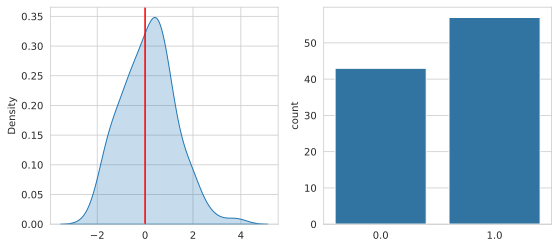

In [45]:
from sklearn import preprocessing
arr = np.random.randn(100)

threshold=0
scaler = preprocessing.Binarizer(threshold=threshold).fit(arr.reshape(-1, 1)) 
arr_trans = scaler.transform(arr.reshape(-1, 1))

fig = plt.figure(figsize=(9,4))
sns.kdeplot(arr, fill=True, ax=plt.subplot(121))
plt.axvline(threshold, color='r')

sns.countplot(x=arr_trans.flatten(), fill=True, ax=plt.subplot(122), color=color[0])

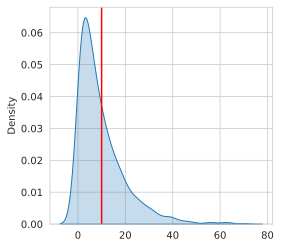

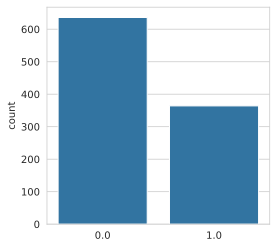

In [116]:
from sklearn import preprocessing
arr = np.random.exponential(10, size=1000)

threshold=10
scaler = preprocessing.Binarizer(threshold=threshold).fit(arr.reshape(-1, 1)) 
arr_trans = scaler.transform(arr.reshape(-1, 1))

fig = plt.figure(figsize=(4,4))
sns.kdeplot(arr, fill=True, ax=plt.subplot(111))
plt.axvline(threshold, color='r')
plt.savefig('tmp1.png', dpi=200, bbox_inches='tight')

fig = plt.figure(figsize=(4,4))
sns.countplot(x=arr_trans.flatten(), 
              fill=True, ax=plt.subplot(111), color=color[0])
plt.savefig('tmp2.png', dpi=200, bbox_inches='tight')

### KBinsDiscretizer

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.KBinsDiscretizer.html#sklearn.preprocessing.KBinsDiscretizer

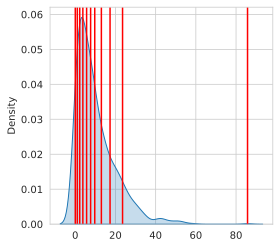

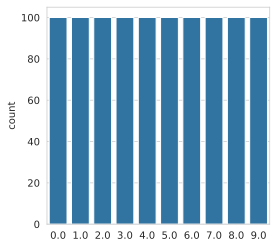

In [117]:
from sklearn import preprocessing
arr = np.random.exponential(10, size=1000)

scaler = preprocessing.KBinsDiscretizer(
    n_bins=10, encode='ordinal', strategy='quantile').fit(arr.reshape(-1, 1))
arr_trans = scaler.transform(arr.reshape(-1, 1))

fig = plt.figure(figsize=(4,4))
sns.kdeplot(arr, fill=True, ax=plt.subplot(111))
for edge in scaler.bin_edges_[0]:
    plt.axvline(edge, color='r')
plt.savefig('tmp1.png', dpi=200, bbox_inches='tight')

fig = plt.figure(figsize=(4,4))
sns.countplot(x=arr_trans.flatten(), fill=True, ax=plt.subplot(111), color=color[0])
plt.savefig('tmp2.png', dpi=200, bbox_inches='tight')

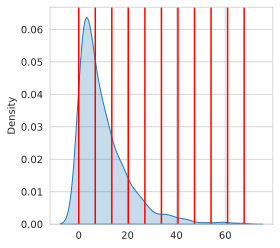

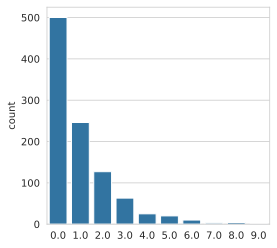

In [118]:
from sklearn import preprocessing
arr = np.random.exponential(10, size=1000)
scaler = preprocessing.KBinsDiscretizer(
    n_bins=10, encode='ordinal', strategy='uniform').fit(arr.reshape(-1, 1))
arr_trans = scaler.transform(arr.reshape(-1, 1))

fig = plt.figure(figsize=(4,4))
sns.kdeplot(arr, fill=True, ax=plt.subplot(111))
for edge in scaler.bin_edges_[0]:
    plt.axvline(edge, color='r')
plt.savefig('tmp1.png', dpi=200, bbox_inches='tight')

fig = plt.figure(figsize=(4,4))
sns.countplot(x=arr_trans.flatten(), fill=True, ax=plt.subplot(111), color=color[0])
plt.savefig('tmp2.png', dpi=200, bbox_inches='tight')

### StandardScaler

In [10]:
from sklearn import preprocessing
import numpy as np
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])
X_scaled = preprocessing.scale(X_train)

X_scaled

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

In [11]:
X_scaled.mean(0), X_scaled.std(0)

(array([0., 0., 0.]), array([1., 1., 1.]))

In [12]:
scaler = preprocessing.StandardScaler().fit(X_train)
scaler.transform(X_train)

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

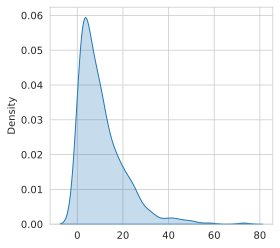

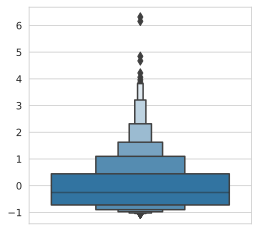

In [130]:
from sklearn import preprocessing
arr = np.random.exponential(10, size=1000)
scaler = preprocessing.StandardScaler().fit(arr.reshape(-1, 1))
arr_trans = scaler.transform(arr.reshape(-1, 1))

fig = plt.figure(figsize=(4,4))
sns.kdeplot(arr, fill=True, ax=plt.subplot(111))
plt.savefig('tmp1.png', dpi=200, bbox_inches='tight')

fig = plt.figure(figsize=(4,4))
sns.boxenplot(y=arr_trans.flatten(), ax=plt.subplot(111), color=color[0])
plt.savefig('tmp2.png', dpi=200, bbox_inches='tight')

### MinMaxScaler

X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))


In [13]:
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])

min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_train_minmax

array([[0.5       , 0.        , 1.        ],
       [1.        , 0.5       , 0.33333333],
       [0.        , 1.        , 0.        ]])

In [14]:
X_test = np.array([[-3., -1.,  4.]])
X_test_minmax = min_max_scaler.transform(X_test)
X_test_minmax

array([[-1.5       ,  0.        ,  1.66666667]])

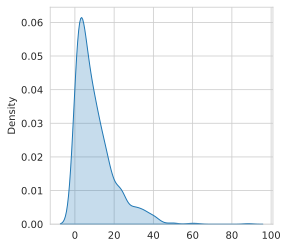

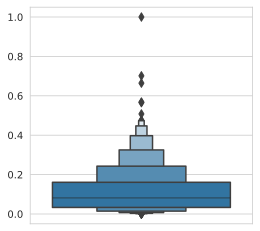

In [131]:
from sklearn import preprocessing
arr = np.random.exponential(10, size=1000)
scaler = preprocessing.MinMaxScaler().fit(arr.reshape(-1, 1))
arr_trans = scaler.transform(arr.reshape(-1, 1))

fig = plt.figure(figsize=(4,4))
sns.kdeplot(arr, fill=True, ax=plt.subplot(111))
plt.savefig('tmp1.png', dpi=200, bbox_inches='tight')

fig = plt.figure(figsize=(4,4))
sns.boxenplot(y=arr_trans.flatten(), ax=plt.subplot(111), color=color[0])
plt.savefig('tmp2.png', dpi=200, bbox_inches='tight')

### MaxAbsScaler

Scale each feature by its maximum absolute value.

In [125]:
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])

max_abs_scaler = preprocessing.MaxAbsScaler()
X_train_maxabs = max_abs_scaler.fit_transform(X_train)
X_train_maxabs

array([[ 0.5, -1. ,  1. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  1. , -0.5]])

In [126]:
X_test = np.array([[ -3., -1.,  4.]])
max_abs_scaler.transform(X_test)

array([[-1.5, -1. ,  2. ]])

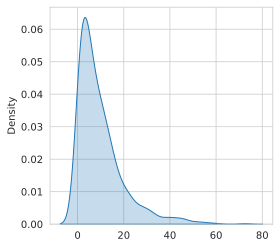

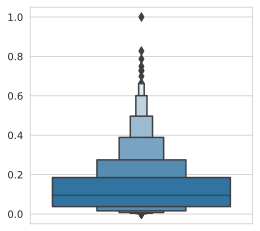

In [132]:
from sklearn import preprocessing
arr = np.random.exponential(10, size=1000)
scaler = preprocessing.MaxAbsScaler().fit(arr.reshape(-1, 1))
arr_trans = scaler.transform(arr.reshape(-1, 1))

fig = plt.figure(figsize=(4,4))
sns.kdeplot(arr, fill=True, ax=plt.subplot(111))
plt.savefig('tmp1.png', dpi=200, bbox_inches='tight')

fig = plt.figure(figsize=(4,4))
sns.boxenplot(y=arr_trans.flatten(), ax=plt.subplot(111), color=color[0])
plt.savefig('tmp2.png', dpi=200, bbox_inches='tight')

### RobustScaler

Scale features using statistics that are robust to outliers.

This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).

In [117]:
from sklearn.preprocessing import RobustScaler
X = [[ 1., -2.,  2.],
     [ -2.,  1.,  3.],
     [ 4.,  1., -2.]]
robust_scaler = RobustScaler().fit(X)
robust_scaler.transform(X)

array([[ 0. , -2. ,  0. ],
       [-1. ,  0. ,  0.4],
       [ 1. ,  0. , -1.6]])

In [123]:
X_test = np.array([[ -3., -1.,  4.]])
robust_scaler.transform(X_test)

array([[-1.33333333, -1.33333333,  0.8       ]])

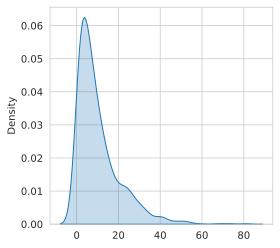

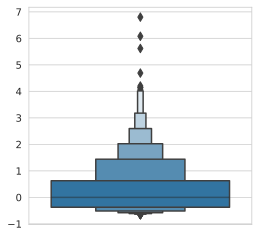

In [133]:
from sklearn import preprocessing
arr = np.random.exponential(10, size=1000)
scaler = preprocessing.RobustScaler().fit(arr.reshape(-1, 1))
arr_trans = scaler.transform(arr.reshape(-1, 1))

fig = plt.figure(figsize=(4,4))
sns.kdeplot(arr, fill=True, ax=plt.subplot(111))
plt.savefig('tmp1.png', dpi=200, bbox_inches='tight')

fig = plt.figure(figsize=(4,4))
sns.boxenplot(y=arr_trans.flatten(), ax=plt.subplot(111), color=color[0])
plt.savefig('tmp2.png', dpi=200, bbox_inches='tight')

### QuantileTransformer

In [104]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

X = [[ 1., -2.,  2.],
     [ -2.,  1.,  3.],
     [ 4.,  1., -2.]]
transformer = preprocessing.QuantileTransformer(random_state=0)
X_trans = transformer.fit_transform(X)

X_test = np.array([[ -3., -1.,  4.]])
transformer.transform(X_test)

/home/lyz/.local/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:2590: UserWarning: n_quantiles (1000) is greater than the total number of samples (3). n_quantiles is set to n_samples.
  warnings.warn(


array([[0.        , 0.16666667, 1.        ]])

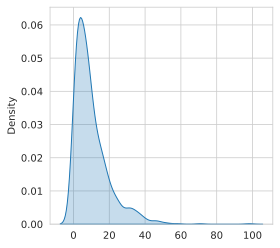

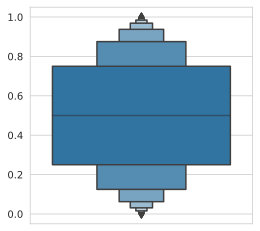

In [134]:
from sklearn import preprocessing
arr = np.random.exponential(10, size=1000)
scaler = preprocessing.QuantileTransformer().fit(arr.reshape(-1, 1))
arr_trans = scaler.transform(arr.reshape(-1, 1))

fig = plt.figure(figsize=(4,4))
sns.kdeplot(arr, fill=True, ax=plt.subplot(111))
plt.savefig('tmp1.png', dpi=200, bbox_inches='tight')

fig = plt.figure(figsize=(4,4))
sns.boxenplot(y=arr_trans.flatten(), ax=plt.subplot(111), color=color[0])
plt.savefig('tmp2.png', dpi=200, bbox_inches='tight')

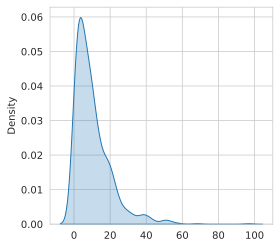

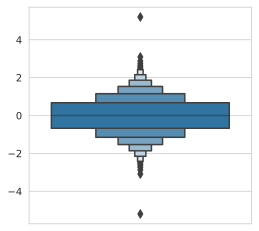

In [135]:
from sklearn import preprocessing
arr = np.random.exponential(10, size=1000)
scaler = preprocessing.QuantileTransformer(output_distribution='normal').fit(arr.reshape(-1, 1))
arr_trans = scaler.transform(arr.reshape(-1, 1))

fig = plt.figure(figsize=(4,4))
sns.kdeplot(arr, fill=True, ax=plt.subplot(111))
plt.savefig('tmp1.png', dpi=200, bbox_inches='tight')

fig = plt.figure(figsize=(4,4))
sns.boxenplot(y=arr_trans.flatten(), ax=plt.subplot(111), color=color[0])
plt.savefig('tmp2.png', dpi=200, bbox_inches='tight')

<AxesSubplot:>

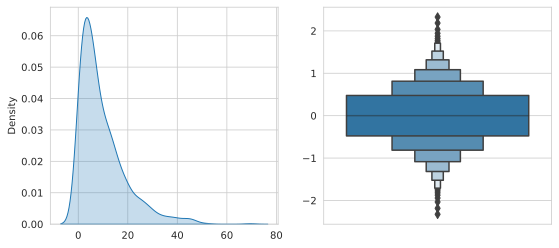

In [128]:
from scipy.special import erfinv 
def scale_rankgauss(x, epsilon=1e-3): 
    '''rankgauss'''
    x = x.argsort().argsort() # rank
    x = (x/x.max()-0.5)*2 # scale
    x = np.clip(x, -1+epsilon, 1-epsilon)
    x = erfinv(x)
    return x

arr = np.random.exponential(10, size=1000)
arr_trans = scale_rankgauss(arr)

fig = plt.figure(figsize=(9,4))
sns.kdeplot(arr, fill=True, ax=plt.subplot(121))
sns.boxenplot(y=arr_trans.flatten(), ax=plt.subplot(122), color=color[0])

### PowerTransformer

In [145]:
X = [[ 1., -2.,  2.],
     [ -2.,  1.,  3.],
     [ 4.,  1., -2.]]
transformer = preprocessing.PowerTransformer(method='yeo-johnson')
X_train_trans = transformer.fit_transform(X)

X_test = np.array([[ -3., -1.,  4.]])
transformer.transform(X_test)

array([[-1.69330581, -1.16422924,  1.79597707]])

In [146]:
X = [[ 1., 2.,  2.],
     [ 2.,  1.,  3.],
     [ 4.,  1., 2.]]
transformer = preprocessing.PowerTransformer(method='box-cox')
X_train_trans = transformer.fit_transform(X)

X_test = np.array([[ 3., 1.,  4.]])
transformer.transform(X_test)

array([[ 0.71642862, -0.70710678,  1.63323418]])

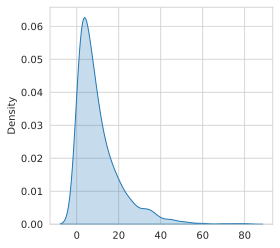

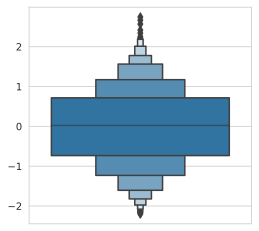

In [136]:
from sklearn import preprocessing
arr = np.random.exponential(10, size=1000)
scaler = preprocessing.PowerTransformer(method='yeo-johnson').fit(arr.reshape(-1, 1))
arr_trans = scaler.transform(arr.reshape(-1, 1))

fig = plt.figure(figsize=(4,4))
sns.kdeplot(arr, fill=True, ax=plt.subplot(111))
plt.savefig('tmp1.png', dpi=200, bbox_inches='tight')

fig = plt.figure(figsize=(4,4))
sns.boxenplot(y=arr_trans.flatten(), ax=plt.subplot(111), color=color[0])
plt.savefig('tmp2.png', dpi=200, bbox_inches='tight')

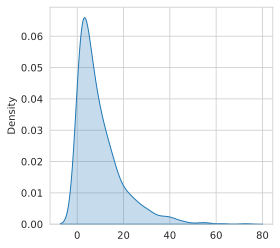

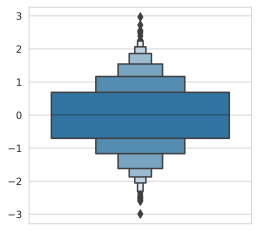

In [137]:
from sklearn import preprocessing
arr = np.random.exponential(10, size=1000)
scaler = preprocessing.PowerTransformer(method='box-cox').fit(arr.reshape(-1, 1))
arr_trans = scaler.transform(arr.reshape(-1, 1))

fig = plt.figure(figsize=(4,4))
sns.kdeplot(arr, fill=True, ax=plt.subplot(111))
plt.savefig('tmp1.png', dpi=200, bbox_inches='tight')

fig = plt.figure(figsize=(4,4))
sns.boxenplot(y=arr_trans.flatten(), ax=plt.subplot(111), color=color[0])
plt.savefig('tmp2.png', dpi=200, bbox_inches='tight')

### Normalizer

In [131]:
X = [[ 1., -1.,  2.],
     [ 2.,  0.,  0.],
     [ 0.,  1., -1.]]
X_normalized = preprocessing.normalize(X, norm='l2')
X_normalized

array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678]])

In [130]:
normalizer = preprocessing.Normalizer().fit(X)  # fit does nothing
normalizer.transform(X)

array([[ 0.33333333, -0.66666667,  0.66666667],
       [-0.53452248,  0.26726124,  0.80178373],
       [ 0.87287156,  0.21821789, -0.43643578]])

<AxesSubplot:ylabel='Density'>

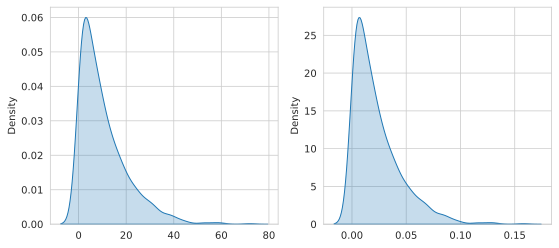

In [93]:
from sklearn import preprocessing
arr = np.random.exponential(10, size=1000)
scaler = preprocessing.Normalizer().fit(arr.reshape(1, -1))
arr_trans = scaler.transform(arr.reshape(1, -1))

fig = plt.figure(figsize=(9,4))
sns.kdeplot(arr, fill=True, ax=plt.subplot(121))
sns.kdeplot(x=arr_trans.flatten(), fill=True, ax=plt.subplot(122), color=color[0])

## 模型调参

### GridSearch

In [93]:
%%time

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
num_estimators = [50,10]
learn_rates = [0.02, 0.05]
max_depths = [1, 2]
min_samples_leaf = [5,10]
min_samples_split = np.linspace(0.02, 0.8, 5)

data = datasets.load_iris() 
X, y = data.data[:, :], data.target

param_grid = {'n_estimators': num_estimators,
              'learning_rate': learn_rates,
              'max_depth': max_depths,
              'min_samples_leaf': min_samples_leaf,
              'min_samples_split': min_samples_split}

grid_search =GridSearchCV(GradientBoostingClassifier(), param_grid, cv=5, verbose=0, n_jobs=-1)

grid_search.fit(X, y)
grid_search.best_score_, grid_search.best_params_

CPU times: user 326 ms, sys: 13.3 ms, total: 339 ms
Wall time: 1.87 s


(0.9666666666666668,
 {'learning_rate': 0.05,
  'max_depth': 2,
  'min_samples_leaf': 10,
  'min_samples_split': 0.02,
  'n_estimators': 50})

### RandomizedSearch

In [94]:
%%time

import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
num_estimators = [50,10]
learn_rates = [0.02, 0.05]
max_depths = [1, 2]
min_samples_leaf = [5,10]
min_samples_split = np.linspace(0.02, 0.8, 5)

data = datasets.load_iris() 
X, y = data.data[:, :], data.target

param_grid = {'n_estimators': num_estimators,
              'learning_rate': learn_rates,
              'max_depth': max_depths,
              'min_samples_leaf': min_samples_leaf,
              'min_samples_split': min_samples_split}

random_search = RandomizedSearchCV(GradientBoostingClassifier(), param_grid, random_state=1, 
                                   n_iter=20, cv=5, verbose=0, n_jobs=-1)

random_search.fit(X, y)
random_search.best_score_, random_search.best_params_

CPU times: user 147 ms, sys: 4.87 ms, total: 152 ms
Wall time: 557 ms


(0.9533333333333334,
 {'n_estimators': 50,
  'min_samples_split': 0.605,
  'min_samples_leaf': 5,
  'max_depth': 1,
  'learning_rate': 0.05})

### HalvingGridSearchCV

In [95]:
%%time

# GPU 内存
# batch size 2 - 1024 迭代次数 100 // 10,  100 // 20, 100 // 1, 100 // 100
# batch size越大 lr越大 

# Val Loss  0.567   0.560
# Loss 和 最终编辑距离打分并不是完全一致

# 模型耗时：数据读取 + 数据增强 + 模型正向传播 + 梯度计算/参数更新
# model.fit 

# nvidia-dlia

import numpy as np
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
num_estimators = [50,10]
learn_rates = [0.02, 0.05]
max_depths = [1, 2]
min_samples_leaf = [5,10]
min_samples_split = np.linspace(0.02, 0.8, 5)

data = datasets.load_iris() 
X, y = data.data[:, :], data.target

param_grid = {'n_estimators': num_estimators,
              'learning_rate': learn_rates,
              'max_depth': max_depths,
              'min_samples_leaf': min_samples_leaf,
              'min_samples_split': min_samples_split}

halving_grid_search = HalvingGridSearchCV(GradientBoostingClassifier(), param_grid, 
                                          random_state=1, cv=5, verbose=0, n_jobs=-1, min_resources=20, )
halving_grid_search.fit(X, y)
halving_grid_search.best_score_, halving_grid_search.best_params_

CPU times: user 352 ms, sys: 11.7 ms, total: 364 ms
Wall time: 2.04 s


(0.9333333333333333,
 {'learning_rate': 0.02,
  'max_depth': 2,
  'min_samples_leaf': 5,
  'min_samples_split': 0.41000000000000003,
  'n_estimators': 10})

### HalvingRandomSearchCV

In [96]:
%%time

import numpy as np
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.ensemble import GradientBoostingClassifier
num_estimators = [50,10]
learn_rates = [0.02, 0.05]
max_depths = [1, 2]
min_samples_leaf = [5,10]
min_samples_split = np.linspace(0.02, 0.8, 5)

data = datasets.load_iris() 
X, y = data.data[:, :], data.target

param_grid = {'n_estimators': num_estimators,
              'learning_rate': learn_rates,
              'max_depth': max_depths,
              'min_samples_leaf': min_samples_leaf,
              'min_samples_split': min_samples_split}

halving_random_search = HalvingRandomSearchCV(GradientBoostingClassifier(), param_grid, random_state=1, cv=5, verbose=0, n_jobs=-1)
halving_random_search.fit(X, y)
halving_random_search.best_score_, halving_random_search.best_params_

CPU times: user 63.9 ms, sys: 0 ns, total: 63.9 ms
Wall time: 183 ms


(0.9444444444444443,
 {'n_estimators': 10,
  'min_samples_split': 0.215,
  'min_samples_leaf': 5,
  'max_depth': 2,
  'learning_rate': 0.05})

## sklearn案例：MNIST分类

In [35]:
import pandas as pd
dfTrain = pd.read_csv('https://cdn.coggle.club/kaggle-digit-recognizer/train.csv.zip')
dfTest = pd.read_csv('https://cdn.coggle.club/kaggle-digit-recognizer/test.csv.zip')

y = dfTrain['label'].values.flatten()
x = dfTrain.drop(['label'],axis=1).values 

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_dev, y_train, y_dev = train_test_split(x,y,random_state=42)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/home/lyz/.local/lib/python3.10/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['degrees', 'clf']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


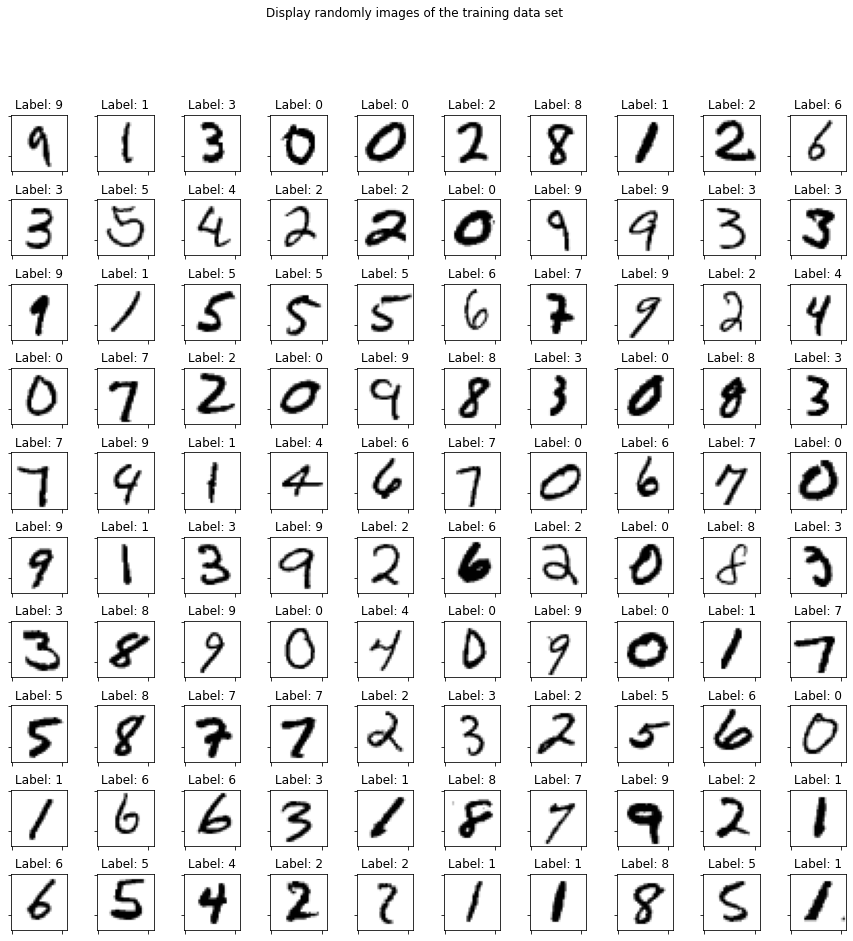

In [37]:
%pylab inline
def displayData(X,Y):
    # set up array
    fig, ax = plt.subplots(nrows=10, ncols=10, figsize=(15,15))
    fig.suptitle( "Display randomly images of the training data set")
    # loop over randomly drawn numbers
    for i in range(10):
        for j in range(10):
            ind = np.random.randint(X.shape[0])
            tmp = X[ind,:].reshape(28,28)
            ax[i,j].set_title("Label: {}".format(Y[ind]))
            ax[i,j].imshow(tmp, cmap='gray_r') # display it as gray colors.
            plt.setp(ax[i,j].get_xticklabels(), visible=False)
            plt.setp(ax[i,j].get_yticklabels(), visible=False)
    
    fig.subplots_adjust(hspace=0.5, wspace=0.5)

displayData(x_train,y_train)

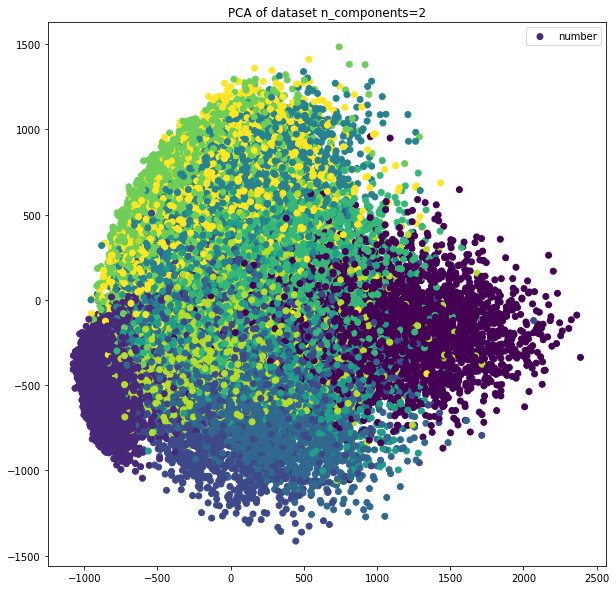

In [38]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
proj = pca.fit_transform(x)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
ax.set_title('PCA of dataset n_components=2')
ax.scatter(proj[:,0],proj[:,1],c=y, label='number')
ax.legend()

### MLP

In [40]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
import scipy

clf = MLPClassifier(solver='lbfgs',hidden_layer_sizes=(100,),  random_state=1 ) 
best_model = clf.fit(x/255.0, y)

In [42]:
dfTrain['label_predicted'] =  best_model.predict(x/255.0)
dfTrain['valid_predicted'] = dfTrain.apply(lambda row: row['label_predicted']==row['label'], axis=1)
y_test_pred = best_model.predict(x)

Text(0.5, 69.0, 'predicted label')

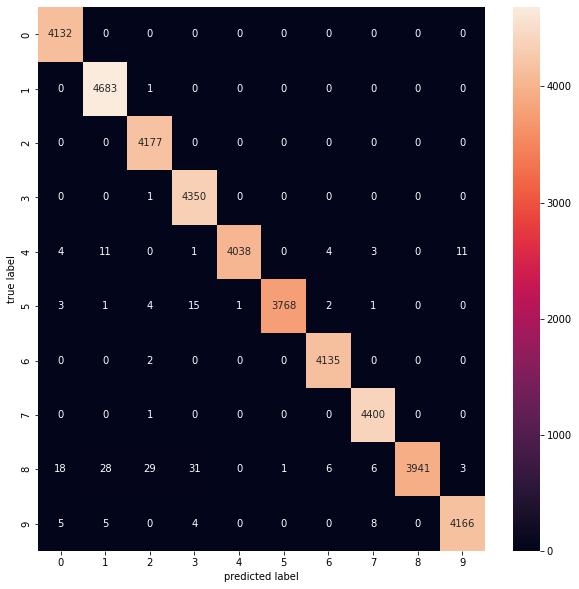

In [43]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
confusion_matrix = confusion_matrix(y, y_test_pred)
fig, ax = plt.subplots(figsize=(10,10))

sn.heatmap(confusion_matrix, annot=True, ax=ax, fmt='g',vmin=0)
ax.set_ylabel("true label")
ax.set_xlabel("predicted label")

### KNeighborsClassifier

In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x, y)

y_test_pred = cross_val_predict(knn, x, y, cv=5)

Text(0.5, 69.0, 'predicted label')

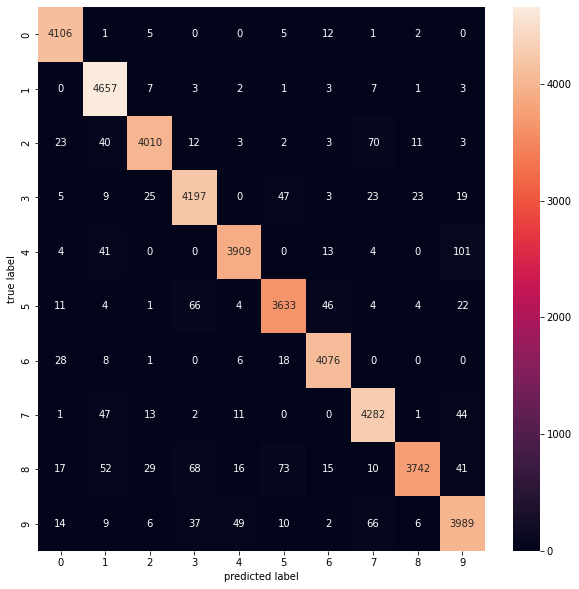

In [46]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
confusion_matrix = confusion_matrix(y, y_test_pred)
fig, ax = plt.subplots(figsize=(10,10))

sn.heatmap(confusion_matrix, annot=True, ax=ax, fmt='g',vmin=0)
ax.set_ylabel("true label")
ax.set_xlabel("predicted label")

### RidgeClassifier

In [47]:
from sklearn.linear_model import RidgeClassifier
clf = RidgeClassifier()
clf.fit(x, y)
y_test_pred = cross_val_predict(knn, x, y, cv=5)

Text(0.5, 69.0, 'predicted label')

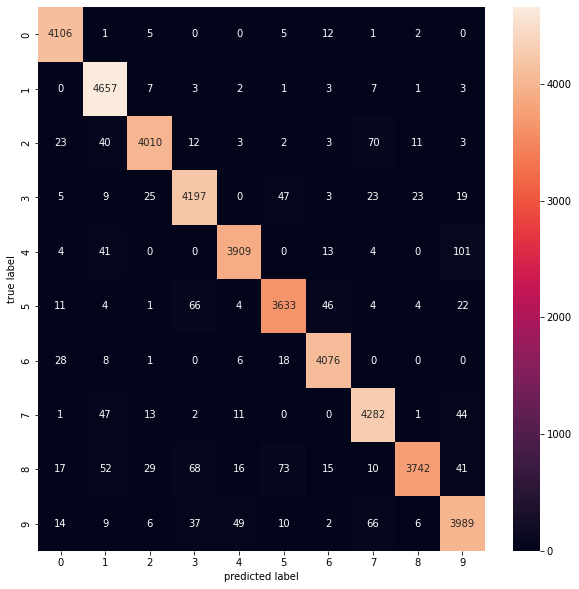

In [48]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
confusion_matrix = confusion_matrix(y, y_test_pred)
fig, ax = plt.subplots(figsize=(10,10))

sn.heatmap(confusion_matrix, annot=True, ax=ax, fmt='g',vmin=0)
ax.set_ylabel("true label")
ax.set_xlabel("predicted label")

# 集成学习

## Bagging

In [107]:
from sklearn.linear_model import RidgeClassifier
ridge = RidgeClassifier()

from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(base_estimator=ridge,
                        n_estimators=10, random_state=0)

data = datasets.load_iris() 
X, y = data.data[:, :], data.target

cross_val_score(clf, X, y, cv=5)

array([0.76666667, 0.86666667, 0.8       , 0.8       , 0.93333333])

## Voting

In [114]:
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

clfs = [
    ['ridge', RidgeClassifier()],
    ['svm', SVC()],
    ['knn', KNeighborsClassifier()],
    ['boosting', GradientBoostingClassifier()]
]

from sklearn.ensemble import VotingClassifier
clf = VotingClassifier(estimators=clfs)

cross_val_score(clf, X, y, cv=5, error_score='raise')

array([0.96666667, 0.96666667, 0.93333333, 0.96666667, 1.        ])

## Stacking

In [115]:
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

clfs = [
    ['ridge', RidgeClassifier()],
    ['svm', SVC()],
    ['knn', KNeighborsClassifier()],
    ['boosting', GradientBoostingClassifier()]
]

from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=clfs)

cross_val_score(clf, X, y, cv=5, error_score='raise')

array([0.96666667, 0.96666667, 0.96666667, 0.93333333, 1.        ])